In [39]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import matplotlib
import keras

df = pd.read_csv('weather.csv')

# print(df.head())

df = df[5::6]
# print(df.head())

# Handle dates
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
print(df[:26])


                               Date Time  p (mbar)  T (degC)  Tpot (K)  \
Date Time                                                                
2009-01-01 01:00:00  01.01.2009 01:00:00    996.50     -8.05    265.38   
2009-01-01 02:00:00  01.01.2009 02:00:00    996.62     -8.88    264.54   
2009-01-01 03:00:00  01.01.2009 03:00:00    996.84     -8.81    264.59   
2009-01-01 04:00:00  01.01.2009 04:00:00    996.99     -9.05    264.34   
2009-01-01 05:00:00  01.01.2009 05:00:00    997.46     -9.63    263.72   
2009-01-01 06:00:00  01.01.2009 06:00:00    997.71     -9.67    263.66   
2009-01-01 07:00:00  01.01.2009 07:00:00    998.33     -9.17    264.12   
2009-01-01 08:00:00  01.01.2009 08:00:00    999.17     -8.10    265.12   
2009-01-01 09:00:00  01.01.2009 09:00:00    999.69     -7.66    265.52   
2009-01-01 10:00:00  01.01.2009 10:00:00   1000.27     -7.04    266.10   
2009-01-01 11:00:00  01.01.2009 11:00:00   1000.87     -7.41    265.68   
2009-01-01 12:00:00  01.01.2009 12:00:

<Axes: xlabel='Date Time'>

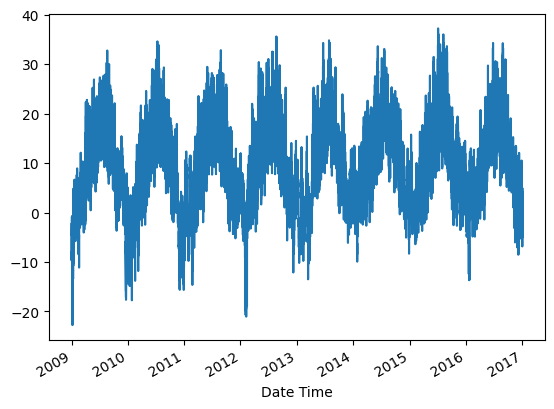

In [40]:
temp = df['T (degC)']
temp.plot()

In [41]:
def df_to_X_y(df, window_size=5):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np) - window_size):
        row = [[a] for a in df_as_np[i:i+5]]
        X.append(row)
        label = df_as_np[i+5]
        y.append(label)
    return np.array(X), np.array(y)


In [42]:
WINDOW_SIZE = 5
X, y = df_to_X_y(temp, window_size=WINDOW_SIZE)
X.shape, y.shape

((70086, 5, 1), (70086,))

In [43]:
X_train, y_train = X[:60000], y[:60000]
X_val, y_val = X[60000:65000], y[60000:65000]
X_test, y_test = X[65000:], y[65000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((60000, 5, 1), (60000,), (5000, 5, 1), (5000,), (5086, 5, 1), (5086,))

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5,1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))
model1.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [45]:
cp = ModelCheckpoint('model1/.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [46]:
model1.fit(X_train,y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 86.7118 - root_mean_squared_error: 9.0861 - val_loss: 1.4706 - val_root_mean_squared_error: 1.2127
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.9558 - root_mean_squared_error: 1.9777 - val_loss: 0.6882 - val_root_mean_squared_error: 0.8296
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.1980 - root_mean_squared_error: 1.0940 - val_loss: 0.5577 - val_root_mean_squared_error: 0.7468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.8288 - root_mean_squared_error: 0.9101 - val_loss: 0.5438 - val_root_mean_squared_error: 0.7375
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.7212 - root_mean_squared_error: 0.8492 - val_loss: 0.5186 - val_root_mean_squared_error: 0.7201
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.6797 - root_mean_squared_error: 0.8244 - val_loss: 0.5033 - val_root_mean_squared_error: 0.7094
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━

In [ ]:
# Load the model we saved earlier
from tensorflow.keras.models import load_model
model1 = load_model('model1/.keras')

In [50]:
train_predictions = model1.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions': train_predictions, 'Actuals': y_train})
train_results

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


,Train Predictions,Actuals
0,-9.889406,-9.67
1,-9.691195,-9.17
2,-8.810503,-8.10
3,-7.353917,-7.66
4,-7.252734,-7.04
...,...,...
59995,6.200828,6.07
59996,7.200140,9.88
59997,12.132198,13.53
59998,15.669937,15.43


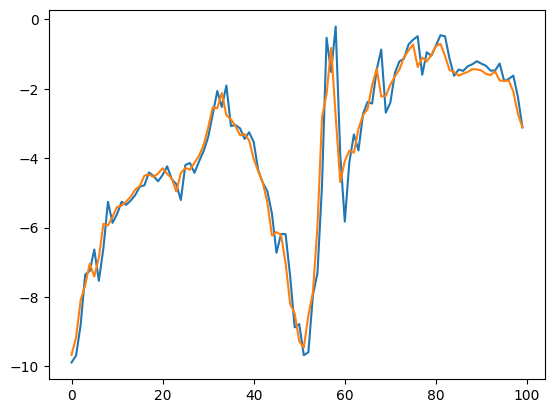

In [53]:

import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][:100])
plt.plot(train_results['Actuals'][:100])

In [54]:
val_predictions = model1.predict(X_val).flatten()
val_results = pd.DataFrame(data={'Val Predictions': val_predictions, 'Actuals': y_val})
val_results

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


,Val Predictions,Actuals
0,15.465517,14.02
1,13.339830,13.67
2,13.105797,12.27
3,11.499770,11.19
4,10.401030,10.85
...,...,...
4995,17.583128,18.27
4996,17.570583,17.85
4997,17.427961,16.65
4998,16.005905,15.85


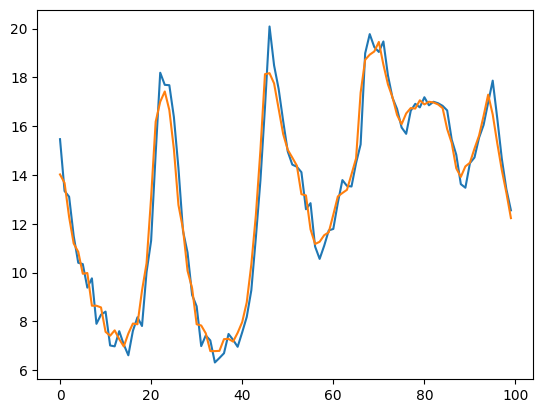

In [55]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [56]:
test_predictions = model1.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Val Predictions': test_predictions, 'Actuals': y_test})
test_results

159/159 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Val Predictions,Actuals
0,14.476536,13.99
1,13.292475,13.46
2,12.914171,12.93
3,12.498207,12.43
4,12.046634,12.17
...,...,...
5081,-1.213450,-0.98
5082,-1.370480,-1.40
5083,-1.524887,-2.75
5084,-3.390069,-2.89


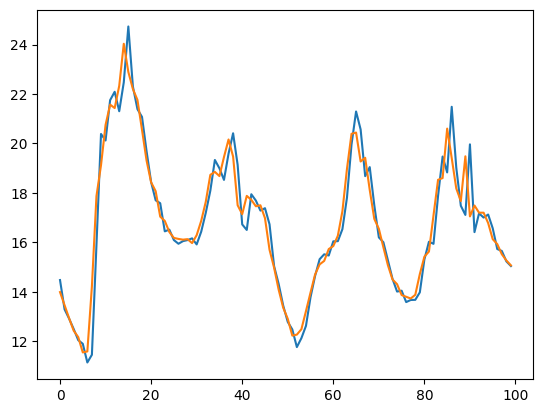

In [57]:
plt.plot(test_results['Val Predictions'][:100])
plt.plot(test_results['Actuals'][:100])